In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

## Feature Checking

In [2]:
data = pd.read_csv("cancer_classification.csv")
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
data.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [4]:
data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

**No missing values. Perfect!**

In [5]:
data["benign_0__mal_1"].value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

Two types of results (0 / 1). **Binary Classification**

## Split into X, Y

In [128]:
x = data.drop("benign_0__mal_1", axis=1)
y = data["benign_0__mal_1"]

## Feature Scaling

Here, we normalize our features

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(x)

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=0)

## Training

### Linear Model

In [131]:
from sklearn.linear_model import RidgeClassifier
lin_class = RidgeClassifier()
lin_class.fit(x_train, y_train)

RidgeClassifier()

In [132]:
y_preds = lin_class.predict(x_test)

In [133]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        47
           1       0.93      1.00      0.96        67

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [134]:
confusion_matrix(y_test, y_preds)

array([[42,  5],
       [ 0, 67]], dtype=int64)

In [135]:
lin_class.score(x_test, y_test)

0.956140350877193

#### The Linear Model (RidgeClassifier) has an accuracy score of 96%

<hr>

### Support Vector Machines

In [136]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [137]:
y_preds_svc = svc.predict(x_test)

In [138]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds_svc))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [139]:
confusion_matrix(y_test, y_preds)

array([[42,  5],
       [ 0, 67]], dtype=int64)

In [140]:
svc.score(x_test, y_test)

0.9736842105263158

#### The Support Vector Machine (SVC) has a score of **97%**

<hr>

### Stochastic Gradient Descent

In [141]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

SGDClassifier()

In [142]:
y_preds_sgd = sgd.predict(x_test)

In [143]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds_sgd))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [144]:
confusion_matrix(y_test, y_preds_sgd)

array([[44,  3],
       [ 1, 66]], dtype=int64)

In [145]:
sgd.score(x_test, y_test)

0.9649122807017544

#### The Stochastic Gradient Descent has a score of **96%**

<hr>

### Nearest Neighbours

In [146]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier()
knnc.fit(x_train,y_train)

KNeighborsClassifier()

In [147]:
y_preds_knn = knnc.predict(x_test)

In [148]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.94      1.00      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [149]:
confusion_matrix(y_test, y_preds_knn)

array([[43,  4],
       [ 0, 67]], dtype=int64)

In [150]:
knnc.score(x_test, y_test)

0.9649122807017544

#### The Nearest Neighbors has a score of 97%

<hr>

### Gaussian Processes

In [151]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc = GaussianProcessClassifier()
gpc.fit(x_train, y_train)

GaussianProcessClassifier()

In [152]:
y_preds_gpc = gpc.predict(x_test)

In [153]:
print(classification_report(y_test, y_preds_gpc))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        47
           1       0.93      1.00      0.96        67

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [154]:
confusion_matrix(y_test, y_preds_gpc)

array([[42,  5],
       [ 0, 67]], dtype=int64)

In [155]:
gpc.score(x_test, y_test)

0.956140350877193

#### The Gaussian Processes has a score of 96%

<hr>

### Naive Bayes

In [156]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [157]:
y_preds_gnb = gnb.predict(x_test)

In [158]:
print(classification_report(y_test, y_preds_gnb))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.92      0.91      0.92        67

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



In [159]:
confusion_matrix(y_test, y_preds_gnb)

array([[42,  5],
       [ 6, 61]], dtype=int64)

In [160]:
gnb.score(x_test, y_test)

0.9035087719298246

#### The Naive Bayes give 90%

<hr>

### Decision Trees

In [161]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [162]:
y_preds_dtc = dtc.predict(x_test)

In [163]:
print(classification_report(y_test,y_preds_dtc))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        47
           1       0.95      0.90      0.92        67

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [164]:
confusion_matrix(y_test, y_preds_dtc)

array([[44,  3],
       [ 7, 60]], dtype=int64)

In [165]:
dtc.score(x_test,y_test)

0.9122807017543859

#### The Decision Trees has a score of 91%

<hr>

### Ensemble Methods

We will see:
- Random Forest Classificaton
- Voting Classifier

In [166]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [167]:
y_preds_rfc = rfc.predict(x_test)

In [168]:
print(classification_report(y_test, y_preds_rfc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [169]:
confusion_matrix(y_test, y_preds_rfc)

array([[46,  1],
       [ 1, 66]], dtype=int64)

In [170]:
rfc.score(x_test, y_test)

0.9824561403508771

#### The Random Forest Classifier has a score of 98%

<br>

### Voting Classifier (Majority Voting)

In [187]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(
    estimators=[
        ('rfc', rfc), ('dtc', dtc), ('knn', knnc), ('gpc', gpc), ('sgd', sgd), ('svc', svc), ('lin', lin_class)
    ], voting='hard'
)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('rfc', RandomForestClassifier()),
                             ('dtc', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('gpc', GaussianProcessClassifier()),
                             ('sgd', SGDClassifier()), ('svc', SVC()),
                             ('lin', RidgeClassifier())])

In [188]:
y_preds_vc = vc.predict(x_test)

In [189]:
print(classification_report(y_test, y_preds_vc))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        47
           1       0.96      1.00      0.98        67

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [190]:
confusion_matrix(y_test, y_preds_vc)

array([[44,  3],
       [ 0, 67]], dtype=int64)

In [191]:
vc.score(x_test, y_test)

0.9736842105263158

#### The majority voting has a score of 97%

<hr>

## Analyzing Performance of different models

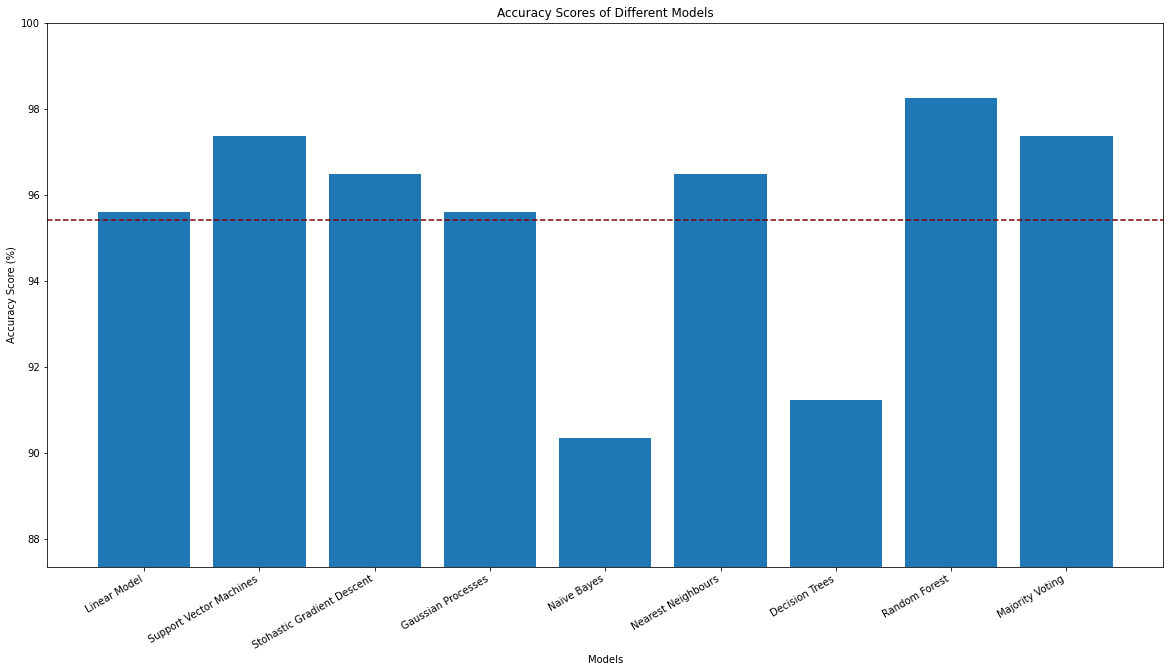

In [232]:
scores = [
    lin_class.score(x_test, y_test)*100,
    svc.score(x_test, y_test)*100,
    sgd.score(x_test, y_test)*100,
    gpc.score(x_test, y_test)*100,
    gnb.score(x_test, y_test)*100,
    knnc.score(x_test, y_test)*100,
    dtc.score(x_test, y_test)*100,
    rfc.score(x_test, y_test)*100,
    vc.score(x_test, y_test)*100,
]

labels = [
    "Linear Model",
    "Support Vector Machines",
    "Stohastic Gradient Descent",
    "Gaussian Processes",
    "Naive Bayes",
    "Nearest Neighbours",
    "Decision Trees",
    "Random Forest",
    "Majority Voting",
]

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(labels, scores)

ax.set_ylim(ymin=np.amin(scores)-3, ymax=100)

ax.axhline(np.mean(scores), color='maroon',linestyle="--");

ax.set(title="Accuracy Scores of Different Models", xlabel="Models", ylabel="Accuracy Score (%)");
plt.setp(ax.get_xticklabels(), rotation=30, ha='right');

<br>
<hr>

## Using Standardization

In [233]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(x)

In [234]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=0)

In [235]:
lin_class.score(x_test,y_test)

0.9298245614035088

In [236]:
svc.score(x_test, y_test)

0.41228070175438597

In [237]:
sgd.score(x_test, y_test)

0.9210526315789473

In [238]:
gpc.score(x_test, y_test)

0.9385964912280702

In [239]:
gnb.score(x_test, y_test)

0.41228070175438597

In [240]:
knnc.score(x_test, y_test)

0.9473684210526315

In [241]:
dtc.score(x_test, y_test)

0.7631578947368421

In [242]:
rfc.score(x_test, y_test)

0.9298245614035088

In [243]:
vc.score(x_test, y_test)

0.9473684210526315

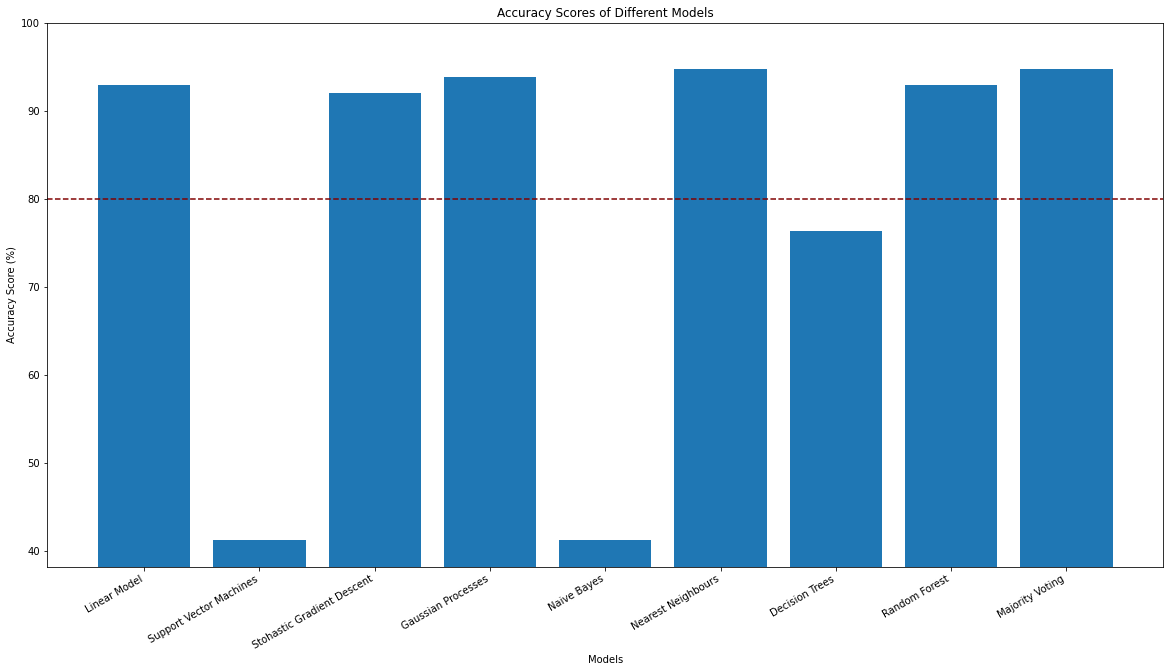

In [244]:
scores = [
    lin_class.score(x_test, y_test)*100,
    svc.score(x_test, y_test)*100,
    sgd.score(x_test, y_test)*100,
    gpc.score(x_test, y_test)*100,
    gnb.score(x_test, y_test)*100,
    knnc.score(x_test, y_test)*100,
    dtc.score(x_test, y_test)*100,
    rfc.score(x_test, y_test)*100,
    vc.score(x_test, y_test)*100,
]

labels = [
    "Linear Model",
    "Support Vector Machines",
    "Stohastic Gradient Descent",
    "Gaussian Processes",
    "Naive Bayes",
    "Nearest Neighbours",
    "Decision Trees",
    "Random Forest",
    "Majority Voting",
]

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(labels, scores)

ax.set_ylim(ymin=np.amin(scores)-3, ymax=100)

ax.axhline(np.mean(scores), color='maroon',linestyle="--");

ax.set(title="Accuracy Scores of Different Models", xlabel="Models", ylabel="Accuracy Score (%)");
plt.setp(ax.get_xticklabels(), rotation=30, ha='right');

We can see that normalizing the data for this case is better for us than standardizing it.